# Solving Time-Independant Shrodinger Equation for Harmonic Oscillator



<img src="https://latex2image-output.s3.amazonaws.com/img-VNWJUhZrW9f5.png">


In [1416]:
import math
import numpy as np
from numpy import pi
import matplotlib.pyplot as mlt

In [1417]:
#defining all the necessary constants here
h_bar    = 1 #atomic unit
m        = 1 #mass
w        = 1 #omega
com_term = h_bar**2 /(2*m) 

In [1418]:
def psi_solv(div):
    H = H_psi(div)
    E, psi = np.linalg.eigh(H)
    return psi
def E_solv(div):
    H = H_psi(div)
    E, psi = np.linalg.eigh(H)
    return E
def H_psi(div):
    R = np.linspace(-10,10,div)
    x = R[1] - R[0]
    v = V(R)
    t = T_with_fourier_transform(len(R),x)
    H = v + t
    return H
def array_for_V(R):
    return 0.5 * m * w**2 * R**2
def V(R):
    V_arr = array_for_V(R)
    cap_V = np.zeros((len(R),len(R)))
    for i in range(0,len(R)):
        cap_V[i,i] = V_arr[i]
    return cap_V
def T_with_fourier_transform(n,del_x):
    k = np.pi/del_x
    cap_T = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if(i==j):
                cap_T[i,j] = com_term * ((k**2)/3)*(1+(2/(n**2)))
            else:
                cap_T[i,j] = com_term * (2*k**2*(-1)**(j-i))/(n**2 * (np.sin(np.pi*(j-i)/n))**2)
    return cap_T     

In [1419]:
def del_x(div):
    del_x = np.zeros(div)
    E_list = np.empty(div)
    E_list = E_solv(div)
    for i in range(1,div):
        del_x[i-1] = E_list[i] - E_list[i-1]
    del_x = np.delete(del_x, -1)
    return del_x
def mean_del_x(div):
    mean_list = np.empty(div)
    mean_list = E_solv(div)
    sum = 0
    for i in range(1,div):
        del_x = mean_list[i] - mean_list[i-1]
        sum += del_x
    mean = sum/div
    return mean
def std_dev(div):
    E_lst = np.empty(div)
    E_lst = E_solv(div)
    del_x = np.zeros(div)
    mean_del_x_ = mean_del_x(div)
    del_x_dev = np.zeros(div)
    sqrd_sum = 0
    for i in range(1,div):
        del_x[i-1] = E_lst[i] - E_lst[i-1]
        del_x_dev[i-1] = del_x[i-1] - mean_del_x_
    del_x_dev = np.delete(del_x_dev, -1)
    for j in range(0,div-1):
        sqrd_sum += math.pow(del_x_dev[j], 2)  
    std_dev = math.sqrt(sqrd_sum/div-1)
    return std_dev
def std_dev_actual(div):
    E_lst = np.empty(div)
    E_lst = E_solv(div)
    del_x = np.zeros(div)
    del_x_dev = np.zeros(div)
    sqrd_sum = 0
    for i in range(1,div):
        del_x[i-1] = E_lst[i] - E_lst[i-1]
        del_x_dev[i-1] = del_x[i-1] - 1
    del_x_dev = np.delete(del_x_dev, -1)
    for j in range(0,div-1):
        sqrd_sum += math.pow(del_x_dev[j], 2)
    std_dev_actual_ = math.sqrt(sqrd_sum/div-1)
    return std_dev_actual_

In [1420]:
def prob_err(div):
    del_x_ = np.empty(div-1)
    del_x_ = del_x(div)
    true  = 0
    false = 0
    for i in range(0,div-1):
        if(int(del_x_[i]) == 1.):
            true += 1
        else:
            false += 1
    true_and_false = true + false
    prob_err_ = false/true_and_false
    return prob_err_

In [1421]:
def plt_mean_delx(limit):
    x_axis = np.zeros(limit-4)
    for i in range(5,limit+1):
        x_axis[i-5] = i
    y_axis = np.zeros(limit-4)
    for j in range(5,limit+1):
        y_axis[j-5] = mean_del_x(j)
    mlt.plot(x_axis,y_axis)
def plt_std_dev(limit):
    x_axis = np.zeros(limit-4)
    for i in range(5,limit+1):
        x_axis[i-5] = i
    y_axis = np.zeros(limit-4)
    for j in range(5,limit+1):
        y_axis[j-5] = std_dev(j)
    mlt.plot(x_axis,y_axis)
def plt_std_dev_actual(limit):
    x_axis = np.zeros(limit-4)
    for i in range(5,limit+1):
        x_axis[i-5] = i
    y_axis = np.zeros(limit-4)
    for j in range(5,limit+1):
        y_axis[j-5] = std_dev_actual(j)
    mlt.plot(x_axis,y_axis)
def plt_prob_err(limit):
    x_axis = np.zeros(limit-4)
    for i in range(5,limit+1):
        x_axis[i-5] = i
    y_axis = np.zeros(limit-4)
    for j in range(5,limit+1):
        y_axis[j-5] = prob_err(j)
    mlt.plot(x_axis,y_axis)
def plt_del_x_spc_div(div):
    x_axis = np.zeros(div-1)
    for i in range(0,div-1):
        x_axis[i] = i+1
    y_axis = np.empty(div+1)
    y_axis = del_x(div)
    mlt.plot(x_axis,y_axis)


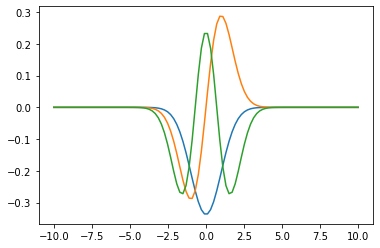

In [1422]:
def plt_frst_i_wve_func(div,num):
    R = np.linspace(-10,10,div)
    psi = psi_solv(div)
    for i in range(0,num+1):
        mlt.plot(R,psi[:,i])
plt_frst_i_wve_func(100,2)

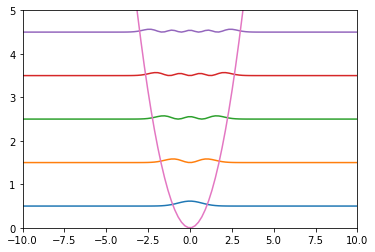

In [1423]:
def plt_potn(div):
    R = np.linspace(-10,10,div)
    v = array_for_V(R)
    mlt.plot(R,v)
def plt_prob_density(div,num):
    R   = np.linspace(-10,10,div)
    E   = E_solv(div)
    psi = psi_solv(div)
    for i in range(0,num+1):
        mlt.plot(R,E[i]+np.conjugate(psi[:,i]) * psi[:,i])
    mlt.ylim(0,num)
    mlt.xlim(-10,10)
plt_prob_density(100,5)
plt_potn(100)

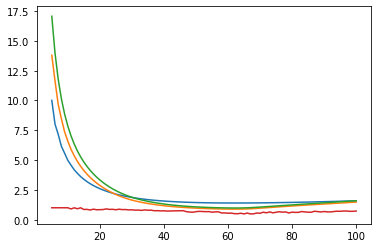

In [1424]:
plt_mean_delx(100)
plt_std_dev(100)
plt_std_dev_actual(100)
plt_prob_err(100)

(0.0, 5.0)

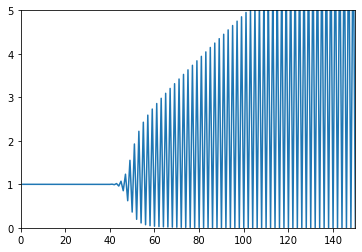

In [1425]:
plt_del_x_spc_div(1000)
mlt.xlim(0,150)
mlt.ylim(0,5)